### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [21]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context 

Laden und Aufbereiten der Trainingsdaten:

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test,  10)

Definition des Neuronalen Netzes:
(Probieren Sie aus, wie sich das Netz verhält, wenn man statt 'relu' 'tanh' oder 'sigmoid' als Aktivierungsfunktion verwendet und wenn man L2-Regularisierung hinzufügt)

In [23]:
# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Ausgabe der Netzstruktur:

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [26]:
history = model.fit(x_train, y_train,
                    batch_size=6000,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 11s 1s/step - loss: 1.9678 - accuracy: 0.4719 - val_loss: 1.4048 - val_accuracy: 0.7168
Epoch 2/50
10/10 [==============================] - 10s 1s/step - loss: 0.9636 - accuracy: 0.7763 - val_loss: 0.5593 - val_accuracy: 0.8384
Epoch 3/50
10/10 [==============================] - 11s 1s/step - loss: 0.4693 - accuracy: 0.8608 - val_loss: 0.3603 - val_accuracy: 0.8970
Epoch 4/50
10/10 [==============================] - 11s 1s/step - loss: 0.3336 - accuracy: 0.9029 - val_loss: 0.2723 - val_accuracy: 0.9233
Epoch 5/50
10/10 [==============================] - 11s 1s/step - loss: 0.2602 - accuracy: 0.9236 - val_loss: 0.2142 - val_accuracy: 0.9360
Epoch 6/50
10/10 [==============================] - 10s 1s/step - loss: 0.2098 - accuracy: 0.9375 - val_loss: 0.1779 - val_accuracy: 0.9476
Epoch 7/50
10/10 [==============================] - 10s 1s/step - loss: 0.1737 - accuracy: 0.9488 - val_loss: 0.1426 - val_accuracy: 0.9560
Epoch 8/50
10/10 [==

Berechnen und Bewerten der Netzausgabe nach dem Training:

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.03266986832022667
Test accuracy: 0.9897000193595886


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

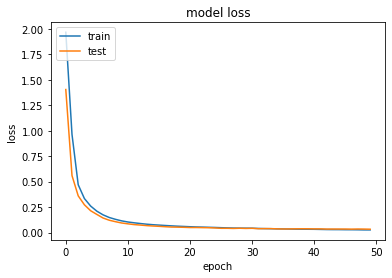

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

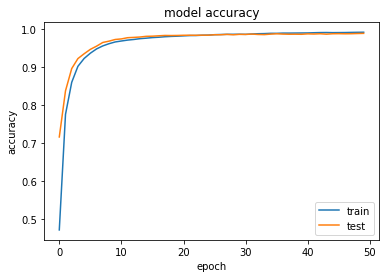

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

313/313 [==============================] - 1s 3ms/step
103 out of 10000 false classifications in test dataset ( 1.03 % )


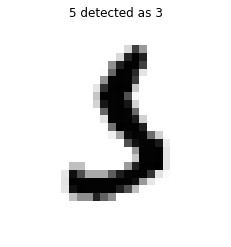

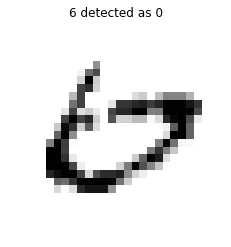

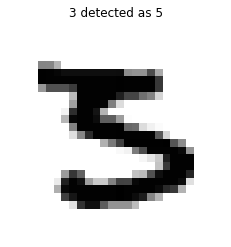

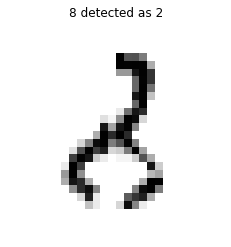

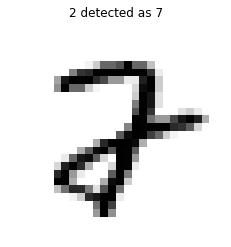

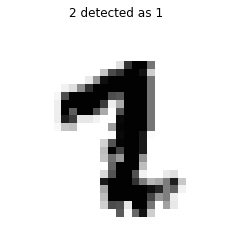

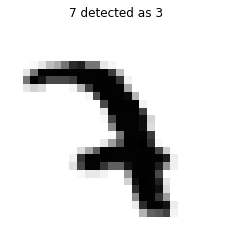

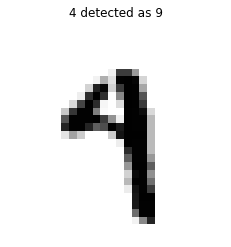

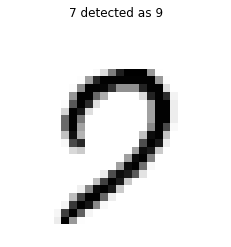

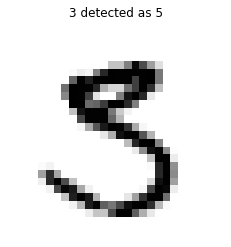

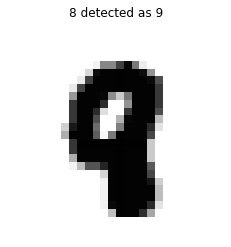

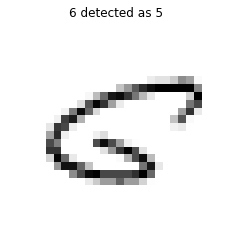

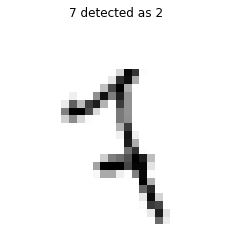

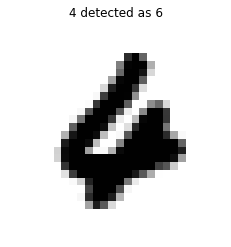

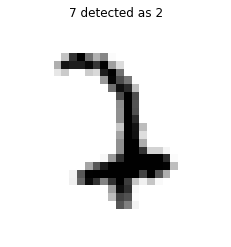

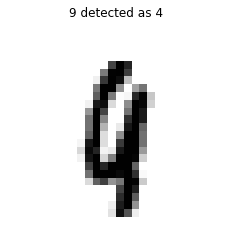

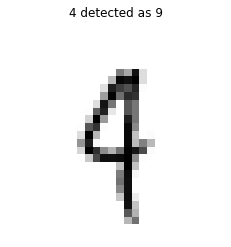

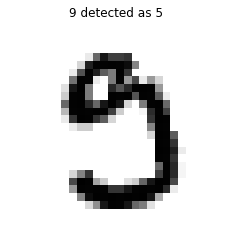

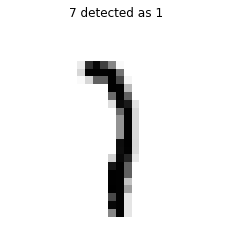

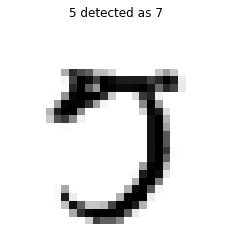

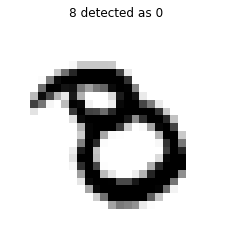

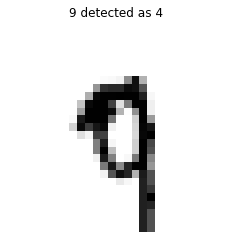

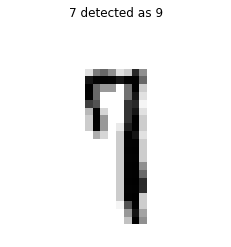

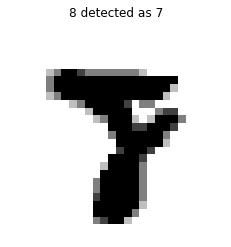

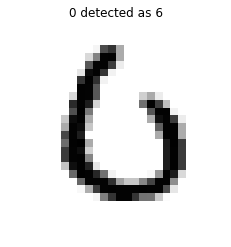

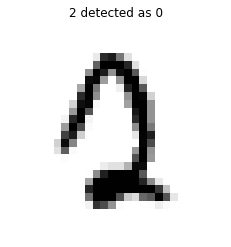

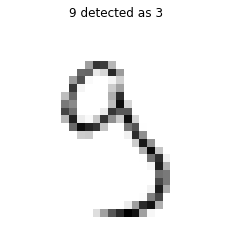

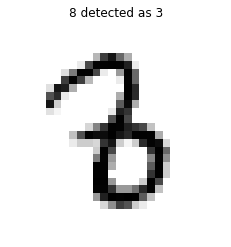

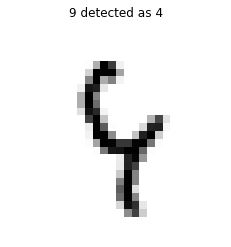

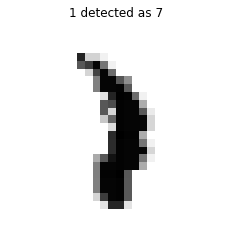

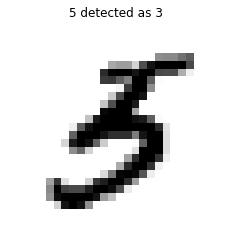

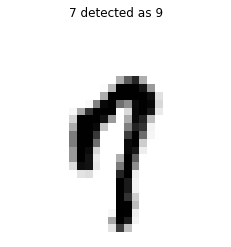

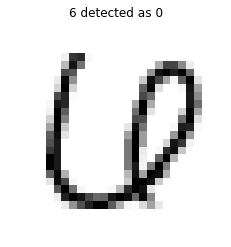

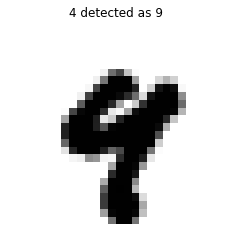

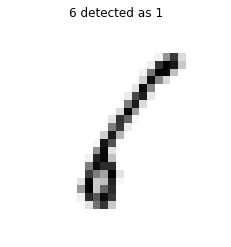

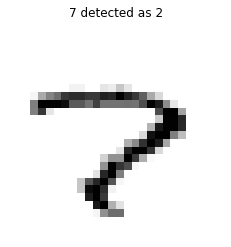

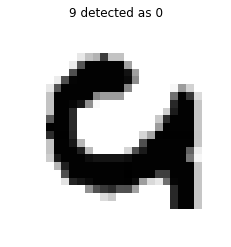

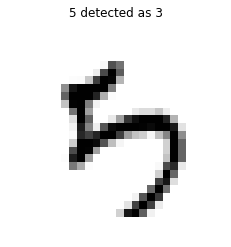

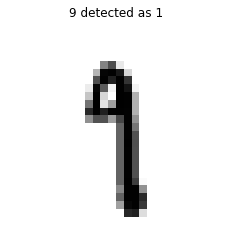

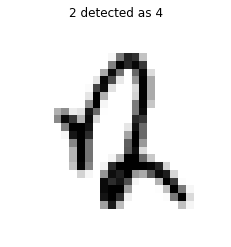

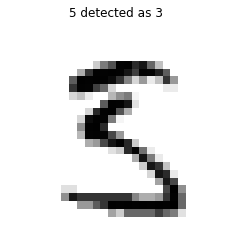

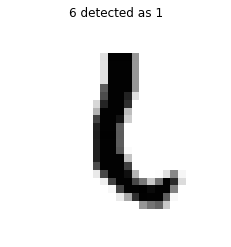

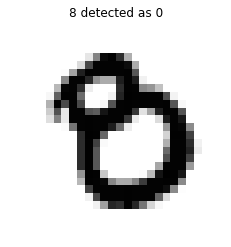

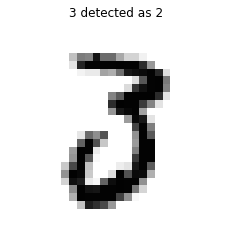

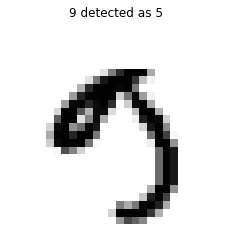

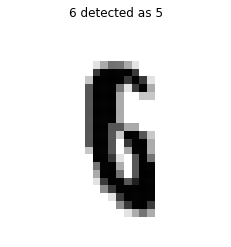

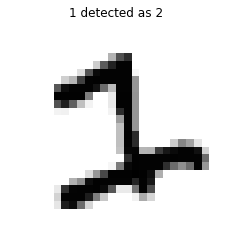

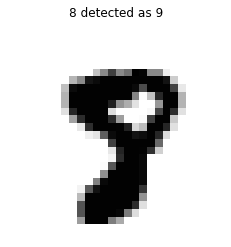

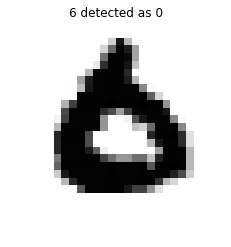

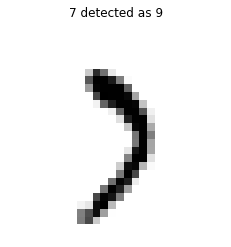

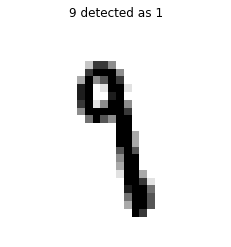

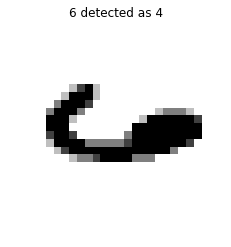

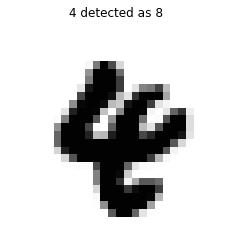

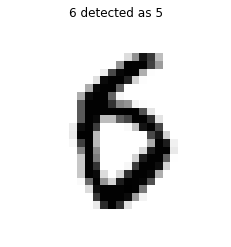

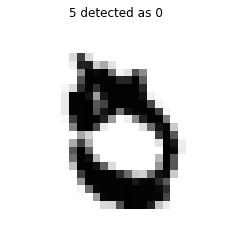

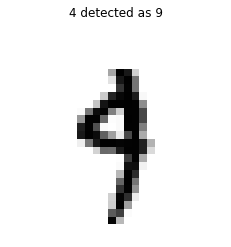

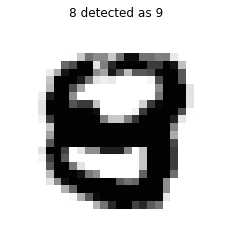

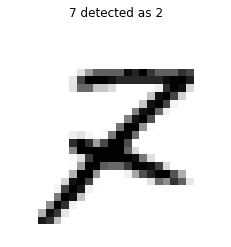

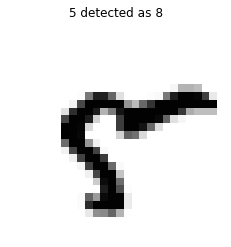

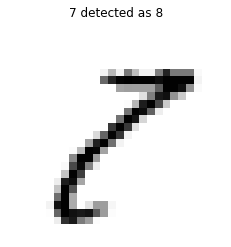

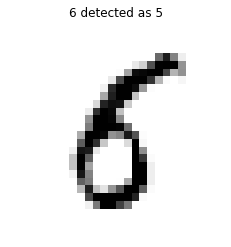

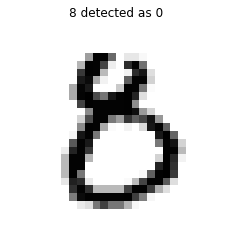

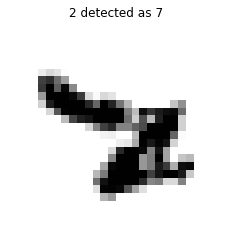

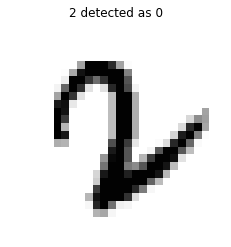

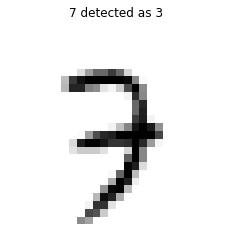

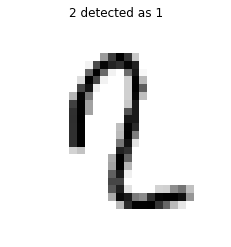

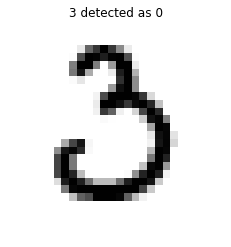

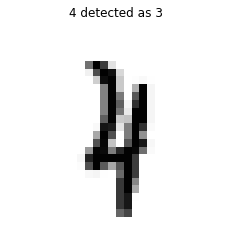

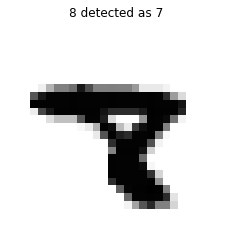

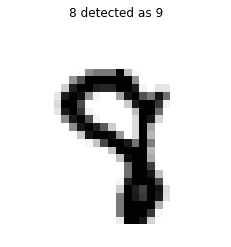

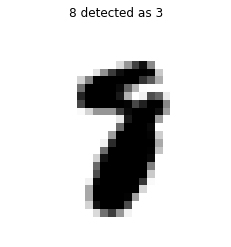

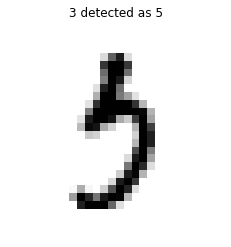

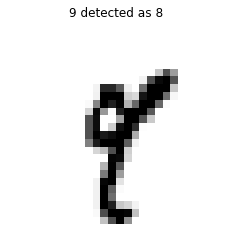

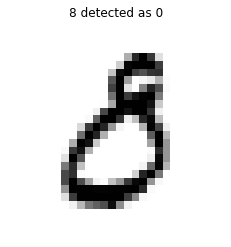

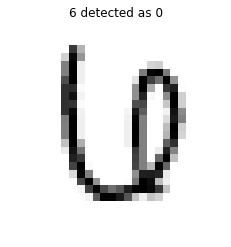

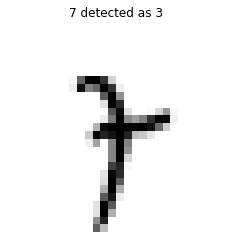

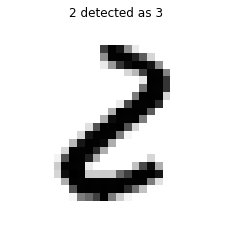

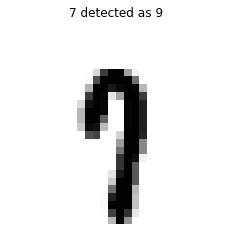

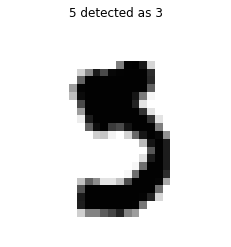

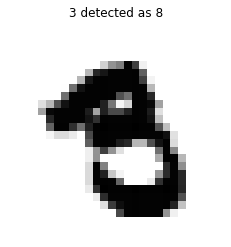

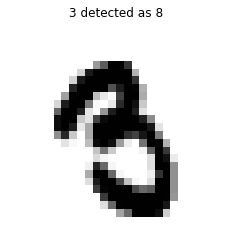

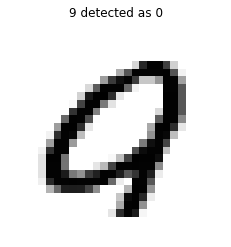

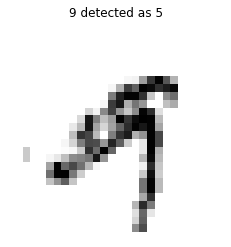

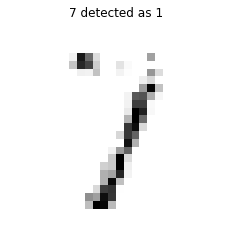

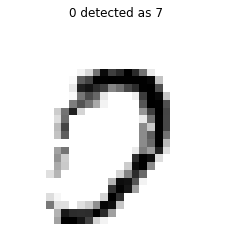

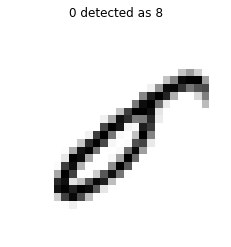

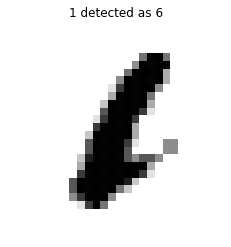

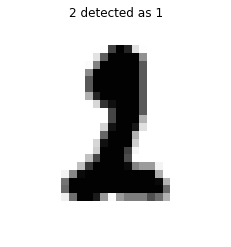

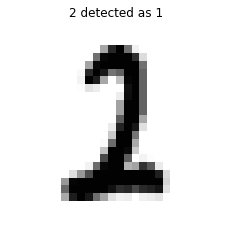

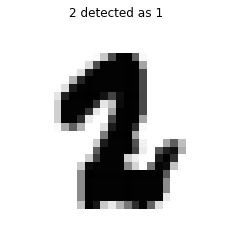

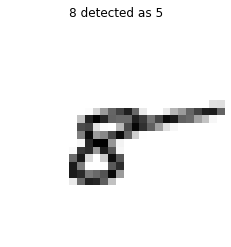

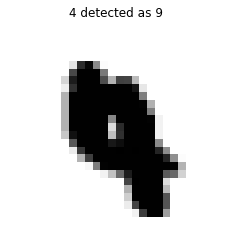

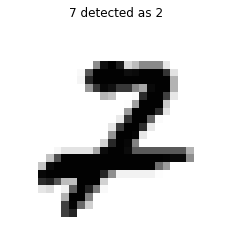

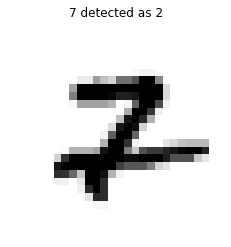

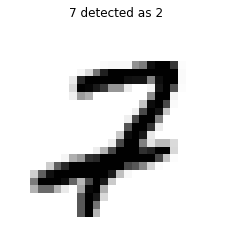

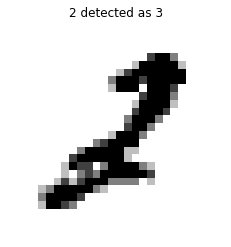

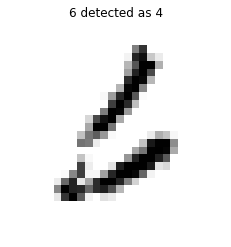

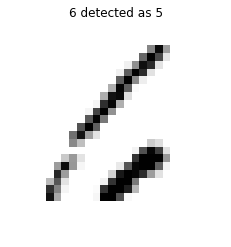

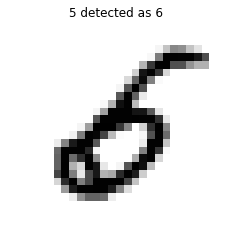

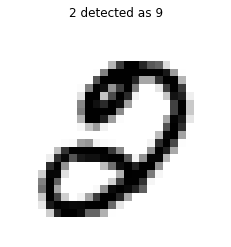

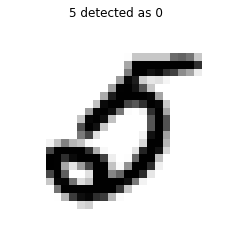

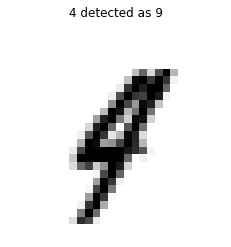

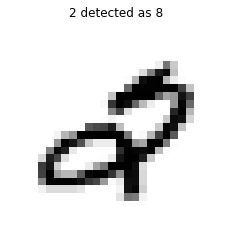

In [30]:
pred = model.predict(x_test)
mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
wrong_pred=pred[mask,:]
wrong_label=np.argmax(wrong_pred,axis=1)
wrong_y=y_test[mask,:]
wrong_x=x_test[mask,:,:]
print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

for i in range(wrong_y.shape[0]):
    plt.imshow(1-wrong_x[i,:,:],cmap='gray')
    plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
    plt.axis('off')
    plt.show()